# k-Nearest Neighbors

Los k vecinos más cercanos es uno de los métodos más simples para realizar predicciones. Este método se basa en tener un conjunto de datos de entrenamiento sobre el cuál realizamos consultas; con estas consultas buscamos obtener los k puntos del conjunto de entrenamiento más cercanos a la posición que estoy consultando (un punto del conjunto de prueba).

In [1]:
import sklearn.datasets # Módulo de conjuntos de datos de muestra
import matplotlib.pyplot as plt # Biblioteca de visualización
import sklearn.model_selection # Módulo de selección de modelos de sklearn
import sklearn.metrics # Módulo de métricas de desempeño
import numpy as np # Biblioteca de manejo de datos vectoriales
import scipy.stats # Módulo de estadísticas de scipy
import sklearn.neighbors # Módulo de métodos de vecinos

Generaremos de manera sintética el conjunto de datos que utilizaremos.

In [2]:
features, label = sklearn.datasets.make_moons(noise=0.3, random_state=11, n_samples=200)

Este conjunto de datos sintético consta de una serie de puntos que pertencen a 2 clases.

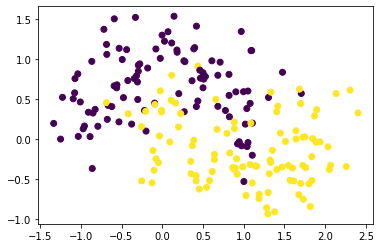

In [3]:
plt.scatter(
    features[:,0],
    features[:,1],
    c=label
)

Separamos el conjunto de datos en subconjuntos de prueba y entrenamiento.

In [4]:
features_train, features_test, label_train, label_test = sklearn.model_selection.train_test_split( # Vamos a guardar todos los subconjuntos que nos devolverá la función en distintas variables
    features, 
    label, 
    test_size=0.33, # Este es el tamaño relativo que tendrá el subconjunto de prueba
    random_state=11, # # Con esto bloqueamos el generador de números aleatorios para tener resultados consistentes
    stratify=label # Conservamos las proporciones entre las clases
)

Visualizamos los subconjuntos de entrenamiento y prueba.

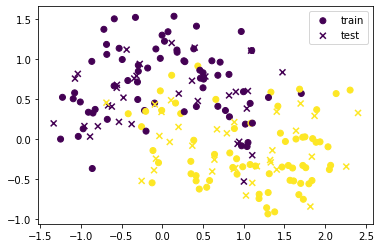

In [5]:
plt.scatter(
    features_train[:,0],
    features_train[:,1],
    c=label_train,
    label="train"
)
plt.scatter(
    features_test[:,0],
    features_test[:,1],
    c=label_test,
    marker = "x",
    label = "test"
)
plt.legend()

## Proceso manual

El primer paso para realizar una predicción utilizando knn es medir las distancias de cada uno de los puntos del conjunto de prueba respecto a los puntos del conjunto de entrenamiento. Por defecto utilizaremos la distancia euclideana entre puntos.

In [6]:
distances = sklearn.metrics.pairwise.euclidean_distances(features_test, features_train)
distances

array([[0.0935166 , 1.61784869, 2.62674364, ..., 2.4396835 , 0.22214432,
        1.56872334],
       [1.36832456, 1.29081232, 1.51508   , ..., 1.08379086, 1.59277268,
        0.40503907],
       [2.04035312, 0.63945043, 0.7054989 , ..., 1.68814273, 2.2805385 ,
        0.90855419],
       ...,
       [1.89271911, 0.58676359, 0.7628742 , ..., 1.57884244, 2.13512876,
        0.73775006],
       [2.74787684, 2.16212661, 1.27174334, ..., 0.36180066, 2.97151095,
        1.30351074],
       [0.85380967, 0.7077109 , 1.77963531, ..., 1.98011546, 1.09014056,
        0.90848572]])

Nuestra matri de distancia tiene tantas filas como puntos tiene el conjunto de prueba y tantas columnas como puntos tiene el conjunto de entrenamiento

In [7]:
distances.shape

(66, 134)

In [8]:
label_train.shape

(134,)

In [9]:
label_test.shape

(66,)

El siguiente paso es ordenar cada uno de los puntos del conjunto de entrenamiento respecto a su distancia con los puntos del conjunto de prueba. Por defecto utilizaremos los 5 vecinos más cercanos.

In [10]:
nearest_neighbors = np.argsort(distances)[:,:5] # Ordenamos cada fila respecto a su valor de distancia
nearest_neighbors

array([[ 94,   0,  47, 132,  30],
       [ 85,  36, 130,  83, 109],
       [113,   8,  98,  70,  39],
       [ 24,  42,   6,  53, 108],
       [ 40,  64,  21, 111, 110],
       [115,  31, 116, 114, 124],
       [115,  31, 128, 107, 116],
       [ 88,  55,  69,  49, 105],
       [ 14, 101, 109,  60,  77],
       [ 54,  70,  80,  76, 106],
       [ 49,  85, 114, 105, 109],
       [ 74,  89,  30,   0,  23],
       [ 92, 108,  27,  66,  48],
       [ 36, 124, 133, 116,  85],
       [  2,  78,  97,  20,  45],
       [ 87,  73, 100, 104,  74],
       [ 44, 102, 117,  81,  93],
       [128,  32,  59, 107,  76],
       [ 51,  62, 123,  17, 106],
       [121,  33,  52,  90,  55],
       [ 85,  36, 109,  49, 114],
       [ 67,  29,  65,  64,  21],
       [ 74,  89,  30,  23,   0],
       [ 23,  74, 100,  89,  30],
       [  4,  46,  68,  57,  38],
       [115,  31, 114, 105, 117],
       [ 54,  70,  80,  76, 107],
       [ 57,  46,  43, 104,  73],
       [127, 132,  94,  22, 125],
       [ 30,  

Posteriormente debemos asignarle la clase a la cual pertenece cada punto del conjunto de entrenamiento

In [11]:
nearest_neighbors_class = label_train[nearest_neighbors] # Asignamos la clase a la que cada punto pertenece
nearest_neighbors_class

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 1, 0, 1],
       [1, 1, 1,

Finalmente le asignamos la clase más frecuente a cada punto del conjunto de prueba.

In [12]:
predicted = scipy.stats.mode(nearest_neighbors_class,axis=1).mode # Utilizamos la moda de cada fila.
predicted

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

Medimos el rendimiento de nuestro método.

In [13]:
print(sklearn.metrics.classification_report(label_test,predicted))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.88      0.88      0.88        33

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



Visualizamos el proceso de predicción. Se puede observar que la mayoría de los puntos más cercanos al punto consultado pertenecen a la clase ``0``.

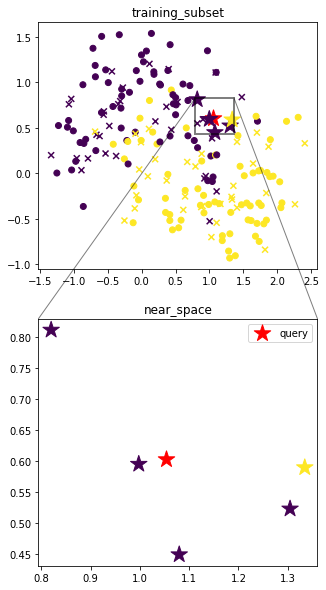

In [14]:
fig,axs = plt.subplots(2,figsize= (5,10))
axs[0].scatter(
    features_train[:,0],
    features_train[:,1],
    c=label_train
)
axs[0].scatter(
    features_test[:,0],
    features_test[:,1],
    c=label_test,
    marker = "x"
)
axs[0].scatter(
    features_test[1,0],
    features_test[1,1],
    c="red",
    marker = "*",
    s=300
)
axs[0].scatter(
    features_train[nearest_neighbors[1],0],
    features_train[nearest_neighbors[1],1],
    c=label_train[nearest_neighbors[1]],
    marker = "*",
    s=300
)
axs[0].set_title("training_subset")
axs[1].scatter(
    features_test[1,0],
    features_test[1,1],
    c="red",
    marker = "*",
    s=300,
    label="query"
)
axs[1].scatter(
    features_train[nearest_neighbors[1],0],
    features_train[nearest_neighbors[1],1],
    c=label_train[nearest_neighbors[1]],
    marker = "*",
    s=300,
)
axs[1].set_title("near_space")
axs[0].indicate_inset_zoom(axs[1], linewidth=2, alpha=0.5,edgecolor='black')
plt.legend()
plt.show()

## Proceso automático utilizando sklearn

sklearn implementa directamente la clase ``sklearn.neighbors.KNeighborsClassifier()`` con la cual podemos ajustar un modelo de knn.

In [15]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(features_train, label_train)
knn_predicted = knn.predict(features_test)

Verificamos que llegamos al mismo rendimiento que con el proceso manual.

In [16]:
print(sklearn.metrics.classification_report(label_test,knn_predicted))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.88      0.88      0.88        33

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



Visualizamos el contorno de decisión de nuestro método. Podemos ver que no todos los puntos son clasificados de manera correcta.

In [17]:
# Funciones para mostrar los umbrales de KNN sobre nuestros datos

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

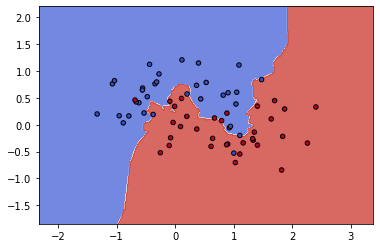

In [18]:
fig, ax = plt.subplots()
X0, X1 = features_test[:,0], features_test[:,1]
xx, yy = make_meshgrid(features_test[:,0], features_test[:,1])
plot_contours(ax, knn, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

Un hiperparámetro es un parámetro de un modelo que no se ajusta en el proceso de entrenamiento y que nosotros debemos ajustar para poder optimizar una métrica. Dos de los hiperparámetros más importantes de este método son el k, el cual nos dicta el espacio en el cual buscaremos puntos para asignarle la clase al punto consultado. Otro hiperparámetro importante es la métrica de distancia que utilizamos para buscar los vecinos más cercanos.

En este nuevo modelo aumentamos el k a 10.

In [19]:
knn_10 = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(features_train, label_train)
knn_10_predicted = knn_10.predict(features_test)

Vemos que mejoró el rendimiento del modelo anterior.

In [20]:
print(sklearn.metrics.classification_report(label_test,knn_10_predicted))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.91      0.88      0.89        33

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.89      0.89      0.89        66



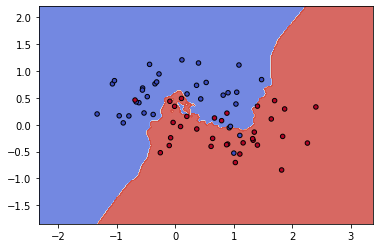

In [21]:
fig, ax = plt.subplots()
X0, X1 = features_test[:,0], features_test[:,1]
xx, yy = make_meshgrid(features_test[:,0], features_test[:,1])
plot_contours(ax, knn_10, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()

En este otro ejemplo variamos la métrica de distancia utilizada hacia la distancia de manhattan. También generamos una mejora en el rendimiento respecto al modelo anterior.

In [22]:
knn_manhattan = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 10, metric = "manhattan")
knn_manhattan.fit(features_train, label_train)
knn_manhattan_predicted = knn_manhattan.predict(features_test)

In [23]:
print(sklearn.metrics.classification_report(label_test,knn_manhattan_predicted))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.91      0.91      0.91        33

    accuracy                           0.91        66
   macro avg       0.91      0.91      0.91        66
weighted avg       0.91      0.91      0.91        66



Además podemos observar que el contorno de decisión cambió su forma.

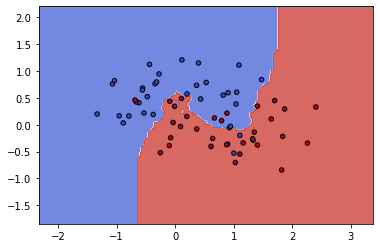

In [24]:
fig, ax = plt.subplots()
X0, X1 = features_test[:,0], features_test[:,1]
xx, yy = make_meshgrid(features_test[:,0], features_test[:,1])
plot_contours(ax, knn_manhattan, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=label_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.show()